In [963]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

%matplotlib inline

DOWNLOADING OUR DATABASE

In [964]:
teams=pd.read_csv("teams.csv")

In [965]:
if isinstance(teams, list):
    teams = pd.DataFrame(teams[1:], columns=teams[0])

In [966]:
print(type(teams))

<class 'pandas.core.frame.DataFrame'>


In [967]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


Selecting Required Columns


In [968]:
print(teams.dtypes)
print(teams.head())

team              object
country           object
year               int64
events             int64
athletes           int64
age              float64
height           float64
weight           float64
medals             int64
prev_medals      float64
prev_3_medals    float64
dtype: object
  team      country  year  events  athletes   age  height  weight  medals  \
0  AFG  Afghanistan  1964       8         8  22.0   161.0    64.2       0   
1  AFG  Afghanistan  1968       5         5  23.2   170.2    70.0       0   
2  AFG  Afghanistan  1972       8         8  29.0   168.3    63.8       0   
3  AFG  Afghanistan  1980      11        11  23.6   168.4    63.2       0   
4  AFG  Afghanistan  2004       5         5  18.6   170.8    64.8       0   

   prev_medals  prev_3_medals  
0          0.0            0.0  
1          0.0            0.0  
2          0.0            0.0  
3          0.0            0.0  
4          0.0            0.0  


In [969]:
print("medals" in teams.columns)

True


PLOTTING THE CORRELATION GRAPH


In [970]:
numeric_columns = teams.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['year', 'events', 'athletes', 'age', 'height', 'weight', 'medals',
       'prev_medals', 'prev_3_medals'],
      dtype='object')


In [971]:
correlation_matrix = teams[numeric_columns].corr()
print(correlation_matrix)


                   year    events  athletes       age    height    weight  \
year           1.000000 -0.016345 -0.056957 -0.012179 -0.001459  0.031400   
events        -0.016345  1.000000  0.976446  0.053461  0.208067  0.127031   
athletes      -0.056957  0.976446  1.000000  0.036358  0.186134  0.109439   
age           -0.012179  0.053461  0.036358  1.000000  0.173694  0.220497   
height        -0.001459  0.208067  0.186134  0.173694  1.000000  0.687398   
weight         0.031400  0.127031  0.109439  0.220497  0.687398  1.000000   
medals        -0.021603  0.771330  0.840817  0.025096  0.141055  0.090577   
prev_medals   -0.017917  0.752264  0.810576  0.032596  0.138682  0.088706   
prev_3_medals -0.010385  0.773115  0.826720  0.041833  0.144322  0.092196   

                 medals  prev_medals  prev_3_medals  
year          -0.021603    -0.017917      -0.010385  
events         0.771330     0.752264       0.773115  
athletes       0.840817     0.810576       0.826720  
age          

In [972]:
medals_correlation = teams[numeric_columns].corrwith(teams['medals'])
print(medals_correlation)

year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
dtype: float64


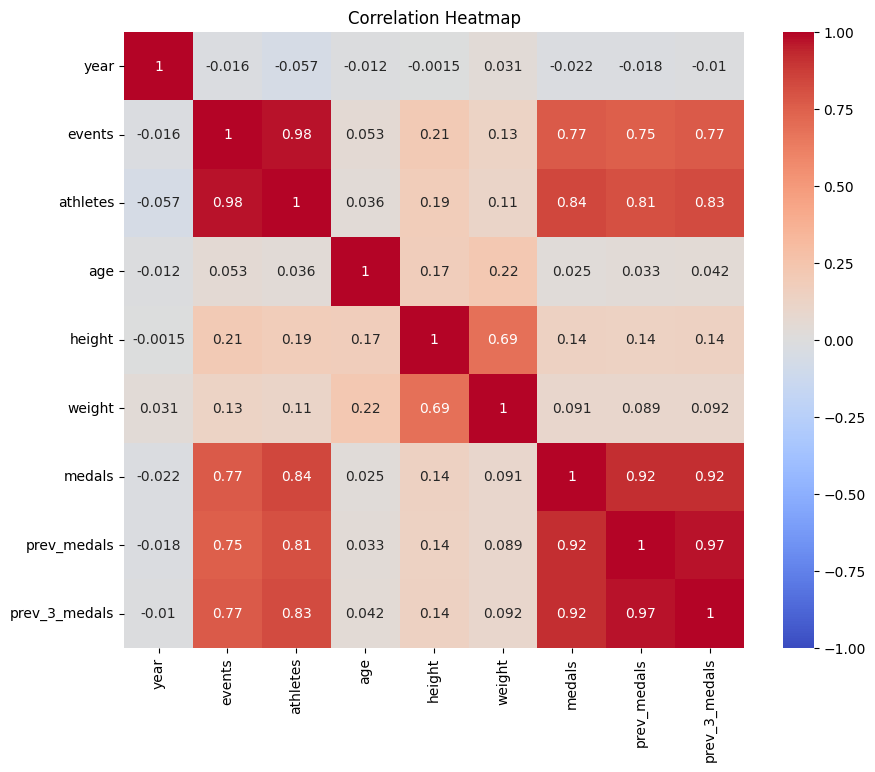

In [973]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

## Exploring the Correlation in the dataset through Visuals :

In [974]:
print(type(teams))

<class 'pandas.core.frame.DataFrame'>


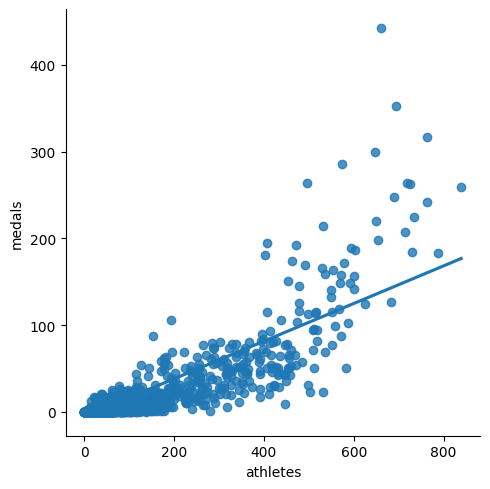

In [975]:
sns.lmplot(x="athletes", y="medals", data = teams,fit_reg=True,ci=None)

 'Age' is not a good correlation with the number of medals won, it does not fit out linear relationship.

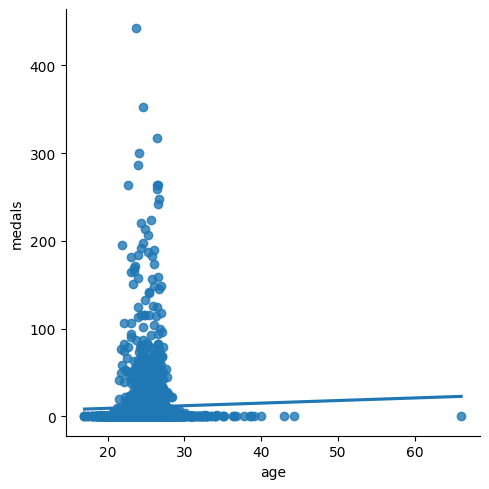

In [976]:
sns.lmplot(x="age", y="medals", data = teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

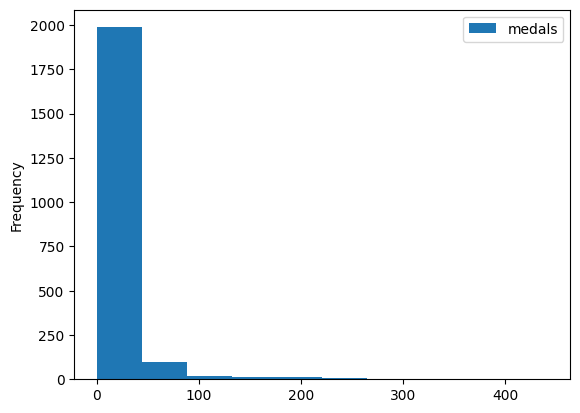

In [977]:
teams.plot.hist(y="medals")

In [978]:
teams=teams[["team","country", "year" , "athletes","age","prev_medals","medals"]]

In [979]:
print(type(teams))

<class 'pandas.core.frame.DataFrame'>


## CLEANING THE DATASET

Finding the missing values :

In [980]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [981]:
team=teams.dropna()

In [982]:
team

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [983]:
train = team[team["year"] < 2012].copy()
test = team[team["year"] >= 2012].copy()

In [984]:
train.shape

(1609, 7)

In [985]:
test.shape

(405, 7)

## TRAINING THE MODEL

In [986]:
reg = LinearRegression()

In [987]:
predictors =["athletes", "prev_medals"]
target = "medals"


In [988]:
reg.fit(train[predictors], train[target])


LinearRegression()

Now the model is trained, we can predict the outputs for the test training set.


In [989]:
predictions = reg.predict(test[predictors])

In [990]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [991]:
test["predictions"]=predictions

In [992]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [993]:
test.loc[test["predictions"]<0,"predictions"] = 0

In [994]:
test["predictions"]=test["predictions"].round()

In [995]:
error=mean_absolute_error(test["medals"],test["predictions"])
error

3.2987654320987656

In [996]:
teams.describe()["medals"]

count    2144.000000
mean       10.556437
std        33.028143
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

In [997]:
errors =( test["medals"] - test["predictions"]).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [998]:
error_team=errors.groupby(test["team"]).mean()
error_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [999]:
medals=test["medals"].groupby(test["team"]).mean()
error_ratio = error_team / medals
error_ratio


team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [1000]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [1001]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio 

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

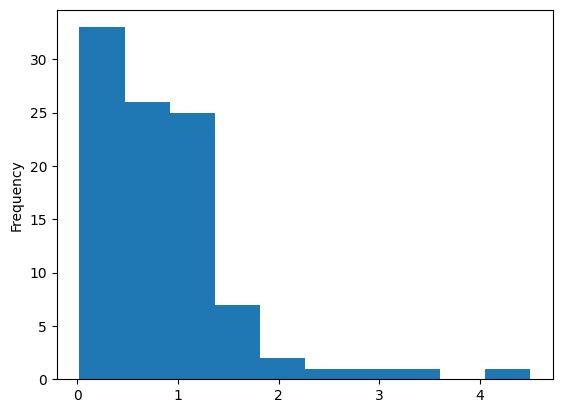

In [1002]:
error_ratio.plot.hist()

In [1003]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64